In [3]:
import pandas as pd

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'2.0.0-alpha0'

## sample snippet showing tf.function and eager execution


In [5]:
# Define the forward pass
@tf.function
def single_layer(x, y):
    return tf.nn.relu(tf.matmul(x, y))

# Generate random data drawn from a uniform distribution
x = tf.random.uniform((2, 3))
y = tf.random.uniform((3, 5))

# by default eager execution is enabled
# can be disabled by using  tf.compat.v1.disable_eager_execution()
single_layer(x, y)

<tf.Tensor: id=25, shape=(2, 5), dtype=float32, numpy=
array([[0.89445204, 0.7446816 , 0.36253726, 0.47863898, 0.7283995 ],
       [0.79431707, 0.7167271 , 0.5470558 , 0.35135847, 0.77774364]],
      dtype=float32)>

- Notice that you did not have to create any sessions or placeholders to run the function single_layer(). 
- This is one of the nifty features of tf.function. Behind the hood, it does all the necessary optimizations so that your code runs faster.

In [7]:
columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
        "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
        "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"]

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                    header=None,
                    names=columns)

In [10]:
# import qgrid
# qgrid.show_grid(data,show_toolbar=True)

In [8]:
# Label Encode
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [9]:
data.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [10]:
# Segregate data features & convert into NumPy arrays
X = data.iloc[:, 0:-1].values

In [11]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5


In [12]:
y = data['Income'].values

In [13]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [16]:
# Get the output probabilities
out_probs = model(X_train.astype(np.float32), training=True)
print(out_probs)

tf.Tensor(
[[0.00870994]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]], shape=(26048, 1), dtype=float32)


## Above we have done only the forward pass

## Train your model

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(X_train, Y_train,
              validation_data=(X_test, Y_test),
              epochs=5, batch_size=64)

Train on 26048 samples, validate on 6513 samples
Epoch 1/5
26048/26048 [==============================] - 1s 32us/sample - loss: 0.5586 - val_loss: 0.5482
Epoch 2/5
26048/26048 [==============================] - 1s 23us/sample - loss: 0.5444 - val_loss: 0.5483
Epoch 3/5
26048/26048 [==============================] - 1s 24us/sample - loss: 0.5419 - val_loss: 0.5483
Epoch 4/5
26048/26048 [==============================] - 1s 24us/sample - loss: 0.5348 - val_loss: 0.5481
Epoch 5/5
26048/26048 [==============================] - 1s 24us/sample - loss: 0.5324 - val_loss: 0.5481


## Trainable parameters in your model

In [25]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(14, 64) dtype=float32, numpy=
 array([[ 1.46168754e-01, -2.43844017e-01,  1.05756059e-01,
          7.65478984e-02, -9.77647603e-02, -3.82975280e-01,
         -6.63518393e-03,  2.62320247e-02, -1.98453739e-02,
          2.12402549e-02,  4.49184738e-02, -1.43168435e-01,
          7.59668797e-02, -1.88478366e-01,  1.13383196e-01,
         -1.04053915e-01, -1.28447253e-03, -1.39247224e-01,
          1.09164901e-01,  4.21509184e-02, -2.22265601e-01,
         -2.63643801e-01,  3.04695424e-02, -1.79906607e-01,
         -1.92752302e-01, -1.87018797e-01, -9.16395038e-02,
         -1.73275083e-01, -5.36628142e-02, -4.42804471e-02,
         -1.30713940e-01, -2.40382478e-01, -1.09530516e-01,
          3.17444414e-01,  2.40139559e-01, -4.39635575e-01,
          4.65867184e-02, -4.58263420e-02, -2.98312940e-02,
          7.42737278e-02,  1.46892205e-01,  2.53466889e-02,
         -4.89447359e-03, -1.52300775e-01, -1.75191239e-01,
         -5.73777854e-02,  9.168

In [32]:
type(model.trainable_variables)

list

In [33]:
len(model.trainable_variables)

6

In [46]:
[print('layer is {} and shape is {}'.format(i+2,j.numpy().shape)) for i,j in enumerate(model.trainable_variables)]

layer is 2 and shape is (14, 64)
layer is 3 and shape is (64,)
layer is 4 and shape is (64, 64)
layer is 5 and shape is (64,)
layer is 6 and shape is (64, 1)
layer is 7 and shape is (1,)


[None, None, None, None, None, None]

In [38]:
model.trainable_variables[2].numpy().shape

(64, 64)

In [47]:
help(tf.keras.layers.Layer)

Help on class Layer in module tensorflow.python.keras.engine.base_layer:

class Layer(tensorflow.python.training.tracking.base.Trackable)
 |  Base layer class.
 |  
 |  This is the class from which all layers inherit.
 |  
 |  A layer is a class implementing common neural networks operations, such
 |  as convolution, batch norm, etc. These operations require managing weights,
 |  losses, updates, and inter-layer connectivity.
 |  
 |  Users will just instantiate a layer and then treat it as a callable.
 |  
 |  We recommend that descendants of `Layer` implement the following methods:
 |  
 |  * `__init__()`: Save configuration in member variables
 |  * `build()`: Called once from `__call__`, when we know the shapes of inputs
 |    and `dtype`. Should have the calls to `add_weight()`, and then
 |    call the super's `build()` (which sets `self.built = True`, which is
 |    nice in case the user wants to call `build()` manually before the
 |    first `__call__`).
 |  * `call()`: Called i

### Defining custom layer by inheriting keras layer

In [50]:
class MyDenseLayer(tf.keras.layers.Layer):
    # Define the constructor
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    # Define the build function to add the weights
    def build(self, input_shape):
        self.kernel = self.add_variable("kernel",
                                    shape=[input_shape[-1],
                                           self.num_outputs])
    # Define the forward pass
    def call(self, input):
        matmul = tf.matmul(input, self.kernel)
        return tf.nn.relu(matmul)

In [51]:
# Initialize the layer with 10 output units
layer = MyDenseLayer(10)
# Supply the input shape
layer(tf.random.uniform((10,3)))
# Display the trainable parameters of the layer
print(layer.trainable_variables)

[<tf.Variable 'my_dense_layer/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[ 0.5871947 ,  0.2719518 , -0.5207156 ,  0.5307281 ,  0.515087  ,
        -0.56889236,  0.1849286 ,  0.05857337, -0.4218513 , -0.05166322],
       [ 0.42664838, -0.10283864,  0.09976953, -0.32675567, -0.19674423,
         0.23550111,  0.20437837,  0.057262  ,  0.04569757,  0.27271807],
       [ 0.19364613, -0.06766313, -0.19314322,  0.15209782, -0.11772496,
        -0.255608  , -0.6316012 ,  0.21347821, -0.64492285,  0.27364182]],
      dtype=float32)>]


In [53]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
        self.bn2c = tf.keras.layers.BatchNormalization()

    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2c(x)
        x = self.bn2c(x, training=training)

        x += input_tensor
        return tf.nn.relu(x)

In [52]:
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block/conv2d/kernel:0', 'resnet_identity_block/conv2d/bias:0', 'resnet_identity_block/batch_normalization_v2/gamma:0', 'resnet_identity_block/batch_normalization_v2/beta:0', 'resnet_identity_block/conv2d_1/kernel:0', 'resnet_identity_block/conv2d_1/bias:0', 'resnet_identity_block/batch_normalization_v2_1/gamma:0', 'resnet_identity_block/batch_normalization_v2_1/beta:0', 'resnet_identity_block/conv2d_2/kernel:0', 'resnet_identity_block/conv2d_2/bias:0', 'resnet_identity_block/batch_normalization_v2_2/gamma:0', 'resnet_identity_block/batch_normalization_v2_2/beta:0']


## Flexibility in model training
- TensorFlow can use automatic differentiation to compute the gradients of the loss function with respect to model parameters. 
- tf.GradientTape creates a tape within a context which is used by TensorFlow to keep track of the gradients recorded from each computation in that tape. 
- To understand this, let's define a model in a more low-level way by extending the tf.keras.Model class.

In [9]:
from tensorflow.keras import Model

In [19]:
class MyCustomModel(Model):
    def __init__(self):
        super(MyCustomModel,self).__init__()
        self.do1=tf.keras.layers.Dropout(rate=0.2,input_shape=((14,)))
        self.fc1=tf.keras.layers.Dense(units=64,activation='relu')
        self.do2=tf.keras.layers.Dropout(rate=0.2)
        self.fc2=tf.keras.layers.Dense(units=64,activation='relu')
        self.do3=tf.keras.layers.Dropout(rate=0.2)
        self.fc3=tf.keras.layers.Dense(units=1,activation='sigmoid')
    def call(x):
        x=self.do1(x)
        x=self.fc1(x)
        x=self.do2(x)
        x=self.fc2(x)
        x=self.do3(x)
        x=self.fc3(x)
        return x

In [20]:
model__=CustomModel()

In [21]:
loss_func=tf.losses.BinaryCrossentropy()

In [22]:
opt=tf.keras.optimizers.Adam()

In [23]:
train_loss=tf.keras.metrics.Mean(name='train_loss')
train_acc=tf.keras.metrics.BinaryAccuracy(name='train_acc')
test_loss=tf.keras.metrics.Mean(name='test_loss')
test_acc=tf.keras.metrics.BinaryAccuracy(name='test_acc')

In [32]:
X_train,X_test=X_train.astype(np.float32),X_test.astype(np.float32)

In [33]:
Y_train,Y_test=Y_train.astype(np.float32),Y_test.astype(np.float32)

In [37]:
Y_train,Y_test=Y_train.reshape([-1,1]),Y_test.reshape([-1,1])

In [38]:
train_ds=tf.data.Dataset.from_tensor_slices((X_train,Y_train)).batch(64)
test_ds=tf.data.Dataset.from_tensor_slices((X_test,Y_test)).batch(64)

In [42]:
@tf.function
def model_train(features,labels):
    with tf.GradientTape() as tape:
        preds=model__(features)
        loss=loss_func(labels,preds)
        grads=tape.gradient(loss,model__.trainable_variables)
        opt.apply_gradients(zip(grads,model__.trainable_variables))
        train_loss(loss)
        train_acc(labels,preds)            

In [43]:
@tf.function
def model_val(features,labels):
    preds=model__(features)
    loss=loss_func(labels,preds)
    
    train_loss(loss)
    train_acc(labels,preds)    

In [51]:
for ep in range(5):
    for feat, label in train_ds:
        model_train(feat,label)
    for t_feat, t_label in test_ds:
        model_val(t_feat,t_label)
    templ='epoch is {}, train loss is {:3f},train_acc is {}, val_loss is {:3f} and val_acc is'
    print(templ.format(ep+1,train_loss.result()*10e5,train_acc.result()*100,test_loss.result()*10e5),test_acc.result()*100)

epoch is 1, train loss is 7557220.500000,train_acc is 71.37046813964844, val_loss is 0.000000 and val_acc is tf.Tensor(0.0, shape=(), dtype=float32)
epoch is 2, train loss is 7378438.000000,train_acc is 71.5301742553711, val_loss is 0.000000 and val_acc is tf.Tensor(0.0, shape=(), dtype=float32)
epoch is 3, train loss is 7275412.500000,train_acc is 71.65166473388672, val_loss is 0.000000 and val_acc is tf.Tensor(0.0, shape=(), dtype=float32)
epoch is 4, train loss is 7042067.500000,train_acc is 71.83634185791016, val_loss is 0.000000 and val_acc is tf.Tensor(0.0, shape=(), dtype=float32)
epoch is 5, train loss is 6856099.500000,train_acc is 71.96324157714844, val_loss is 0.000000 and val_acc is tf.Tensor(0.0, shape=(), dtype=float32)


## examples from tensorflow_datasets

In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds

In [3]:
mnist=tfds.builder('mnist')


In [4]:
mnist.download_and_prepare()

W0708 14:38:22.081953 140324234954560 deprecation.py:323] From /home/abzooba/.local/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:247: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /home/abzooba/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


In [33]:
train_ds,test_ds=mnist.as_dataset(split=[tfds.Split.TRAIN,tfds.Split.TEST])

In [34]:
train_ds=train_ds.batch(32)

In [35]:
for features in train_ds:
    image, label = features["image"], features["label"]
    break

In [36]:
%matplotlib inline

In [37]:
import matplotlib.pyplot as plt

In [43]:
image.get_shape()

TensorShape([32, 28, 28, 1])

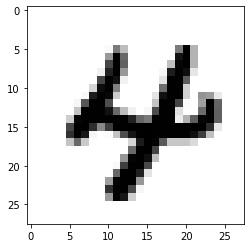

In [46]:
plt.imshow(image[0].numpy().reshape((28,28)),cmap=plt.cm.binary)

### Tensorboard 

In [2]:
%load_ext tensorboard.notebook

In [14]:
from datetime import datetime
import os

# Make a directory to keep the training logs
os.mkdir("logs")

In [15]:
# Set the callback
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
!ls

logs  TF_2_training.ipynb  TF_2_training.slides.html


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dropout(rate=0.2, input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
!kill 10682

In [22]:
%tensorboard --logdir logs/
model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         batch_size=64,
         epochs=10,
         callbacks=[tensorboard_callback],
         verbose=False)

Reusing TensorBoard on port 6006 (pid 10682), started 0:21:21 ago. (Use '!kill 10682' to kill it.)